# Question 1.1

In [1]:
import mysql.connector

connectionInstance = mysql.connector.connect(
     host= "127.0.0.1", 
     user= "root",
     password= "waiwai3232")

cursor = connectionInstance.cursor()
cursor.execute("CREATE DATABASE twitter")

cursor.execute("SHOW DATABASES")

for y in cursor:
    print(y)

('DatabaseName',)
('information_schema',)
('Laxmi',)
('MyDatabase',)
('MyNewDatabase',)
('mysql',)
('NewDatabase',)
('performance_schema',)
('sys',)
('TwDatabase',)
('TwDbase',)
('TweetDataBASE',)
('TweetDBASE',)
('twitter',)
('TwitterDBASE',)
('user',)


In [15]:
#connecting the database with "MyNewDatabase"
import mysql.connector

mydatabase = mysql.connector.connect(
     host= "127.0.0.1", 
     user= "root",
     password= "waiwai3232",
     database= "twitter")

# now create the Table Userinformation

cursor = mydatabase.cursor()
cursor.execute("CREATE TABLE tweettable(ScreenName varchar(150),UserName varchar(150),Userlocation varchar(150),UserDescroption varchar(150),FollowerNumber varchar(150), FriendNumber varchar(150), StatusNumber varchar(150), UserURL varchar(200))")

for Y in cursor:
    print(Y)

('tweettable',)
('usetweet',)


In [3]:
import mysql.connector

mydatabase = mysql.connector.connect(
     host= "127.0.0.1", 
     user= "root",
     password= "waiwai3232",
     database= "Twitter")

cursor = mydatabase.cursor()

# inserting the single row

sql_query = "INSERT INTO tweettable (ScreenName, UserName, Userlocation, UserDescroption, FollowerNumber, FriendNumber, StatusNumber, UserURL) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
value = ("Laxmi59550885", "Laxmi","Houston","love this world", "0", "0", "5", "https://t.co/7IDoW8Ah9W")
cursor.execute(sql_query, value)

mydatabase.commit()
print(cursor.rowcount, value)

1 ('Laxmi59550885', 'Laxmi', 'Houston', 'love this world', '0', '0', '5', 'https://t.co/7IDoW8Ah9W')


# Question 1.2

In [21]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import mysql.connector 
import time
import json

connectionInstance = mysql.connector.connect(
     host= "127.0.0.1", 
     user= "root",
     password= "waiwai3232",
     database= "twitter")

cursor = connectionInstance.cursor()

Consumer_Key = 'oQ4wA3nWX6SrXaK5HdmQBOdw8'
Consumer_Secret = 'XH2usYlx0Kp3gYMJjULZDstQzrQnIDuYNTq6OoJZRKSeVPSYT5'
Access_token ='1192814806681735176-yoniPsr4XMEOdtsphlq9NPKWVfte4K'
Access_token_Secret ='DF12pXdBaKTuvgWDovnApk9EEAh1ibmOvvUaExH40qN6D'

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        ScreenName = all_data["text"]
        UserName = all_data["text"]
        Userlocation = all_data["text"]
        UserDescroption = all_data["text"]
        FollowerNumber = all_data["text"]
        FriendNumber = all_data["text"]
        StatusNumber = all_data["text"]
        UserURL =  all_data["text"]
        
        
        cursor.execute("INSERT INTO tweettable(ScreenName, UserName, Userlocation, UserDescroption, FollowerNumber, FriendNumber, StatusNumber,UserURL) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)",
                      (ScreenName, UserName, Userlocation, UserDescroption, FollowerNumber, FriendNumber, StatusNumber, UserURL))
        
        connectionInstance.commit()

        print(ScreenName, UserName,Userlocation, UserDescroption, FollowerNumber, FriendNumber, StatusNumber, UserURL)
        
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)       
auth.set_access_token(Access_token, Access_token_Secret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["love"])

print( "10 record inserted, userID:", cursor.lastrowid)

RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk RT @manshack_colton: Me when I try to smile at the love of my life 😂😂 https://t.co/dBZmQWWnHk
Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz Deeply in love again hayz
@wiziano_ @Head_ach @GeorgiaCurtiis No p

KeyError: 'text'

# Question 1.3

In [31]:
import tweepy 

# For OAUTH we used Consumer keys and access tokens
Consumer_Key = 'oQ4wA3nWX6SrXaK5HdmQBOdw8'
Consumer_Secret = 'XH2usYlx0Kp3gYMJjULZDstQzrQnIDuYNTq6OoJZRKSeVPSYT5'
Access_token ='1192814806681735176-yoniPsr4XMEOdtsphlq9NPKWVfte4K'
Access_token_Secret ='DF12pXdBaKTuvgWDovnApk9EEAh1ibmOvvUaExH40qN6D'

# for OAuth process, the Keys and tokens are uses
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)

# for setting the access token and access token secret
auth.set_access_token(Access_token, Access_token_Secret)

# creating the object using authentication
api = tweepy.API(auth)

for user in tweepy.Cursor(api.friends, screen_name = "FriendID").items():
    print('Friend: ' + user.screen_name)
    
for user in tweepy.Cursor(api.followers, screen_name = "FollowersID").items():
    print('Follower: '+ user.screen_name)    

Friend: elonmusk
Friend: WhiteHouse
Friend: BarackObama
Friend: realDonaldTrump
Friend: mnegahban
Friend: ElizabethTaylor
Friend: BBC_HaveYourSay
Friend: TehranBureau
Follower: 1DerlandJustin
Follower: MariDagangShop
Follower: zzzaaabbbyyyy
Follower: DandhiRizky
Follower: Bagas_zaa
Follower: rianie_vie
Follower: AkunJahil
Follower: budisusetya
Follower: AndiMasnyur
Follower: RamonHarahap
Follower: ranpermana
Follower: BagasPermana1


Friend: elonmusk
Friend: WhiteHouse
Friend: BarackObama
Friend: realDonaldTrump
Friend: mnegahban
Friend: ElizabethTaylor
Friend: BBC_HaveYourSay
Friend: TehranBureau
Follower: 1DerlandJustin
Follower: MariDagangShop
Follower: zzzaaabbbyyyy
Follower: DandhiRizky
Follower: Bagas_zaa
Follower: rianie_vie
Follower: AkunJahil
Follower: budisusetya
Follower: AndiMasnyur
Follower: RamonHarahap
Follower: ranpermana
Follower: BagasPermana1


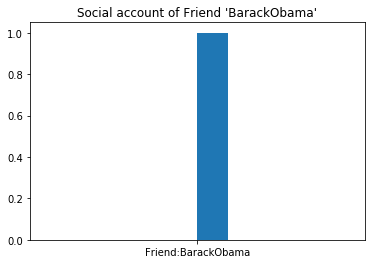

In [30]:
import tweepy 
import matplotlib.pyplot as plt
import numpy as np

# For OAUTH we used Consumer keys and access tokens
Consumer_Key = 'oQ4wA3nWX6SrXaK5HdmQBOdw8'
Consumer_Secret = 'XH2usYlx0Kp3gYMJjULZDstQzrQnIDuYNTq6OoJZRKSeVPSYT5'
Access_token ='1192814806681735176-yoniPsr4XMEOdtsphlq9NPKWVfte4K'
Access_token_Secret ='DF12pXdBaKTuvgWDovnApk9EEAh1ibmOvvUaExH40qN6D'

# for OAuth process, the Keys and tokens are uses
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)

# for setting the access token and access token secret
auth.set_access_token(Access_token, Access_token_Secret)

# creating the object using authentication
api = tweepy.API(auth)

for user in tweepy.Cursor(api.friends, screen_name = "FriendID").items():
    print('Friend: ' + user.screen_name)
    
for user in tweepy.Cursor(api.followers, screen_name = "FollowersID").items():
    print('Follower: '+ user.screen_name)
    
plt.hist("Friend:BarackObama")
plt.title("Social account of Friend 'BarackObama'" )

x= np.hstack(np.arange(10,1000))
y= np.random.randint(100,size=10)

plt.show()

In [ ]:
# using since_startdateand until_enduntil for timeframe doesn't run the syntax.

# Question 2.1

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

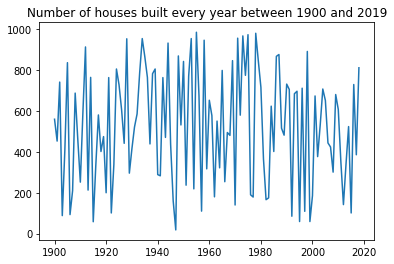

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data= pd.read_csv(r'/Users/AshokLaxmi/Desktop/Assignment_4_property_tax_report_2019.csv')
data = pd.DataFrame(data,columns= ['Year of house built','Number of house built'])

x= np.arange(1900,2019)
y= np.random.randint(1000,size=x.shape)

plt.plot(x,y)
plt.title('Number of houses built every year between 1900 and 2019')
plt.xlable('Year of house built')
plt.ylable('Number of house built')
plt.show() 

# Question 2.2

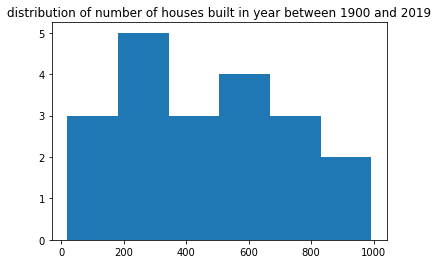

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data= pd.read_csv(r'/Users/AshokLaxmi/Desktop/Assignment_4_property_tax_report_2019.csv')
data = pd.DataFrame(data,columns= ['Year of house built', 'Number of house built'])
x= np.hstack(np.arange(100,10000))
y= np.random.randint(1000,size=20)

plt.hist(y,bins='auto')

plt.title('distribution of number of houses built in year between 1900 and 2019')
plt.xlable='Number of Houses'
plt.ylable='Frequency'
plt.show()

# question 2.3

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv(r'/Users/AshokLaxmi/Desktop/Assignment_4_property_tax_report_2019.csv')
data = np.array(('data','ZONE_CATEGORY'))
labels = 'ZONE_CATEGORY'

sizes = data

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

ValueError: could not convert string to float: 'data'

#question 2.4

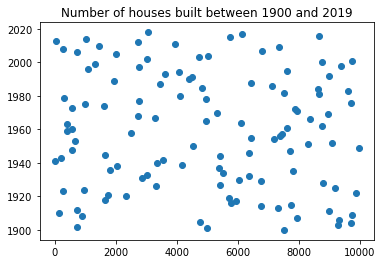

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data= pd.read_csv(r'/Users/AshokLaxmi/Desktop/Assignment_4_property_tax_report_2019.csv')
data = pd.DataFrame(data,columns= ['Number of house built', 'Year of house built'])

y= np.arange(1900,2019)
x= np.random.randint(10000,size=y.shape)
plt.scatter(x,y)
#plt.xlable('Number of house built') and plt.ylable('Year of house built')
plt.title('Number of houses built between 1900 and 2019')
plt.show()